<a href="https://colab.research.google.com/github/Nagmashaik123/Legal-SA/blob/main/ShaikAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression Def :**

---


1. Linear Regression is a Supervised learning Algorithm in Machine Learning.
2. Linear regression can be termed as a linear model, can be better explained through an e.g. it is a model that presume that the input variables (x) and the single output variable (y) exist linearly. Which mean that the value of y can be calculated and computed from a linear combination of the input variables (x).

**Dataset:**

---


Here, the dataset considered for I took the Monset.csv dataset, which contains 6 columns, they are
PRICE 2. HEIGHT 3. WIDTH 4. SIGNED 5. PICTURE 6. HOUSE

In [47]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing


In [48]:
# Reading the dataset
monet_df=pd.read_csv("/content/monet.csv")

In [49]:
monet_df.head()
monet_df.shape

(430, 6)

**Model One:**

---


Model one is created by combining two attributes that lead to the creation of new column in the frame.

**SIZE** = Product of **WIDTH** and **HEIGHT**

In [50]:
monet_df['SIZE']=monet_df['HEIGHT']*monet_df['WIDTH']

In [51]:
monet_df.to_csv("/content/monet_new.csv",index=False )

In [52]:
monet_df=pd.read_csv("/content/monet_new.csv")

**Data Preparation:**

---


1. The input/predictor variable in this use case is X. This is used to predict output variable.
2. The output variable is in this use case is Y. This is the variable we want to predict from the input.
 
This can be demonstrated as follows
X = SIZE (Input)
Y = PRICE (Output)


**Data Division for computation:**

---

iloc function is used to segregate the columns.



In [53]:
#Data division for SIZE

X= monet_df.iloc[:,-1:]
size= X['SIZE']
size

0       545.28
1       816.64
2       109.71
3       822.40
4       822.40
        ...   
425    1008.64
426    1025.64
427    1013.76
428    1008.64
429     822.40
Name: SIZE, Length: 430, dtype: float64

In [54]:
# Data division for PRICE

Y=monet_df.iloc[:, :1]
price= Y['PRICE']
price

0      3.993780
1      8.800000
2      0.131694
3      2.037500
4      1.487500
         ...   
425    5.282500
426    9.352500
427    8.252500
428    3.410000
429    1.542500
Name: PRICE, Length: 430, dtype: float64

**Data Visualisation:**

---
we draw the scatter plot for visualization purpose for the original data .


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Data visulation for original data PricevsSize')]

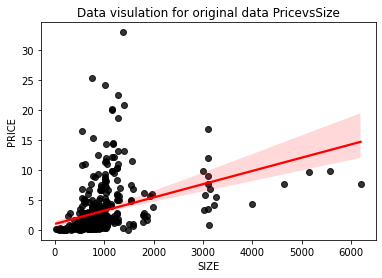

In [55]:
sns.regplot(size, price, scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title='Data visulation for original data PricevsSize')

In [56]:
!pip install sklearn

**Data Splitting:** 

---


Using the library sklearn.model_selection having train_test_split method, we divide the data into training and testing sets.

In this usecase the data is divided into 80:20 then seperating the data into dataframes.



In [57]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(monet_df,test_size =0.2,random_state=0)

In [58]:
# Test data splitting
test_data_size= test_data['SIZE'].values
test_data_size= test_data_size.reshape(-1,1)
test_data_price=test_data['PRICE'].values
test_data_price= test_data_price.reshape(-1,1)

# Train data splitting
train_data_size= train_data['SIZE'].values
train_data_size= train_data_size.reshape(-1,1)
train_data_price=train_data['PRICE'].values
train_data_price= train_data_price.reshape(-1,1)

**Training Model:**

---
Since Linear Regression model has to be implemented we can achive this by using library of sklearn.linear_model having  LinearRegression method. Then model is trained using the traning data.

In [59]:
# Preparing the model for prediction :

Linear_model = LinearRegression()
Linear_model.fit(train_data_size,train_data_price)

LinearRegression()

**Predicting the values:**

---

After training the model. By implementing the Linear Regression model, the values are predicted using testing data.

In [60]:
Predicting_values= Linear_model.predict(test_data_size)
Predicting_values

array([[ 3.18280891],
       [ 1.78902985],
       [ 3.14642788],
       [ 1.94273049],
       [ 3.00641606],
       [ 2.47025533],
       [ 1.31405538],
       [ 2.7418268 ],
       [ 2.08508502],
       [12.70172913],
       [ 2.80696353],
       [ 4.4316151 ],
       [ 3.7619654 ],
       [ 2.92180262],
       [ 2.34668847],
       [ 3.64737896],
       [ 2.99465654],
       [ 2.56097821],
       [ 2.99465654],
       [ 3.51846059],
       [ 3.80946285],
       [ 3.21275894],
       [ 2.59529213],
       [ 2.7418268 ],
       [ 3.26218568],
       [ 1.36527361],
       [ 2.80519501],
       [ 3.22603434],
       [ 1.77570851],
       [ 3.75291608],
       [ 2.34870963],
       [ 3.25899316],
       [ 3.29732644],
       [ 3.11631707],
       [ 2.74035686],
       [ 7.98799794],
       [ 2.73450007],
       [ 3.32920578],
       [10.03296057],
       [ 1.95210136],
       [ 2.2702286 ],
       [ 2.57714755],
       [ 3.18280891],
       [ 5.17551975],
       [ 2.87899061],
       [ 2

**Model Evaluation - by calculating errors:**

---


The model evaluation is done using Scikit-learn library
● Mean Absolute error
● Mean squared error
● Root mean squared error

In [61]:
from sklearn.metrics import mean_absolute_error 
test_data= test_data_price.flatten()
absolute_error= mean_absolute_error(test_data,Predicting_values)
sqrd_error=mean_squared_error(test_data,Predicting_values)
mean_sqrd_error= np.sqrt(sqrd_error)

print("Mean Absolute Error: ", absolute_error, "Mean Squared Error: ",sqrd_error, " Root Mean Squared Error: ",mean_sqerd_error)

Mean Absolute Error:  2.6855486941004547 Mean Squared Error:  16.35922009540488  Root Mean Squared Error:  4.044653272581579


**Data Visualisation for traning and testing data:**

---

Visualization graphs are drawn below

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Testing Data Plot')]

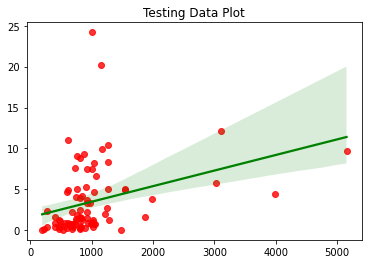

In [62]:
sns.regplot(test_data_size, test_data_price, scatter_kws={"color": "red"}, line_kws={"color": "green"}).set(title='Testing Data Plot')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Training Data Plot')]

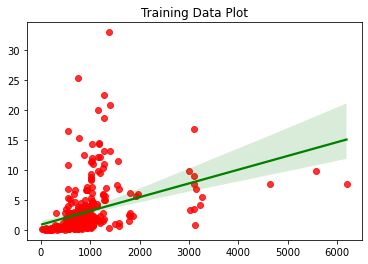

In [63]:
sns.regplot(train_data_size, train_data_price, scatter_kws={"color": "red"}, line_kws={"color": "green"}).set(title='Training Data Plot')

**Model One Conclusion:**

---
It is evident that the values are very approximate to the linear line, which verdicts that there ocuurs minimal errors. Hence based on the accuracy this is proven to be best fit and the model is performing well in predicting jobs.

**Building Model Two:**

---


Model two is created by using two attributes width and price as independent and dependent variables. Where
X stores the values of width and is an independent variable. Y stores the values of price and is a dependable variable. 


In [64]:
# Reading the dataset
monet_df=pd.read_csv("/content/monet.csv")
monet_df.head()
monet_df.shape

(430, 6)

**Data Division for computation - Model Two:**

---
iloc function is used to segregate the columns.



In [65]:
#Data division for Width

X= monet_df.iloc[:,2:]
X2= X['WIDTH']
X2

0      25.6
1      25.6
2      15.9
3      32.0
4      32.0
       ... 
425    39.4
426    39.6
427    39.6
428    39.4
429    32.0
Name: WIDTH, Length: 430, dtype: float64

In [66]:
# Data division for PRICE

Y=monet_df.iloc[:, :1]
Y2= Y['PRICE']
Y2

0      3.993780
1      8.800000
2      0.131694
3      2.037500
4      1.487500
         ...   
425    5.282500
426    9.352500
427    8.252500
428    3.410000
429    1.542500
Name: PRICE, Length: 430, dtype: float64

**Data Visualization:**

---


Now the scatter plot for visualization purpose is drawn for the segregated data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Data visulation for PricevsWidth')]

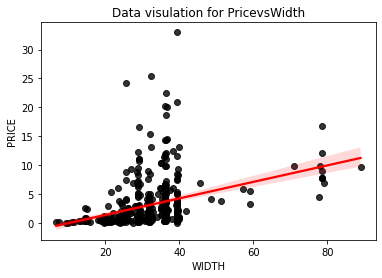

In [67]:
sns.regplot(X2, Y2, scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title='Data visulation for PricevsWidth')

**Data Splitting :**

---


Using the library sklearn.model_selection having train_test_split method, we divide the data into training and testing sets.

In this usecase the data is divided into 80:20 then seperating the data into dataframes.

In [68]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(monet_df,test_size =0.2,random_state=0)
# Test data splitting
test_data_width= test_data['WIDTH'].values
test_data_width= test_data_width.reshape(-1,1)
test_data_price=test_data['PRICE'].values
test_data_price= test_data_price.reshape(-1,1)

# Train data splitting
train_data_width= train_data['WIDTH'].values
train_data_width= train_data_width.reshape(-1,1)
train_data_price=train_data['PRICE'].values
train_data_price= train_data_price.reshape(-1,1)

**Training Model Two:**

---



Since Linear Regression model has to be implemented we can achive this by using library of sklearn.linear_model having LinearRegression method. Then model is trained using the traning data. By considering Width and Price.

In [69]:
Linear_model = LinearRegression()
Linear_model.fit(train_data_width,train_data_price)

LinearRegression()

**Predicting the values:**

---
After training the model. By implementing the Linear Regression model, the values are predicted using testing data.


In [70]:
Predicting_values_two= Linear_model.predict(test_data_width)
Predicting_values_two

array([[ 4.21047729],
       [ 2.50715605],
       [ 3.74882948],
       [ 1.88631933],
       [ 3.73291059],
       [ 2.57083161],
       [-0.4696764 ],
       [ 3.01656053],
       [ 2.55491272],
       [12.10624679],
       [ 3.11207387],
       [ 4.21047729],
       [ 3.03247942],
       [ 3.63739725],
       [ 2.60266939],
       [ 4.60844954],
       [ 3.70107281],
       [ 2.93696608],
       [ 3.70107281],
       [ 3.70107281],
       [ 3.70107281],
       [ 4.24231507],
       [ 3.01656053],
       [ 2.01367045],
       [ 3.12799276],
       [ 1.20180706],
       [ 3.04839831],
       [ 3.63739725],
       [ 1.44059041],
       [ 4.21047729],
       [ 3.12799276],
       [ 2.50715605],
       [ 3.74882948],
       [ 2.92104719],
       [ 3.03247942],
       [10.46660111],
       [ 3.01656053],
       [ 2.60266939],
       [10.3233311 ],
       [ 1.75896821],
       [ 2.50715605],
       [ 2.92104719],
       [ 2.01367045],
       [ 4.22639618],
       [ 2.20469714],
       [ 2

**Model Evaluation - by calculating errors:**

---



In [72]:
from sklearn.metrics import mean_absolute_error 
test_data= test_data_price.flatten()
absolute_error= mean_absolute_error(test_data,Predicting_values_two)
sqrd_error=mean_squared_error(test_data,Predicting_values_two)
mean_sqrd_error= np.sqrt(sqrd_error)

print("Mean Absolute Error: ", absolute_error, "Mean Squared Error: ",sqrd_error, " Root Mean Squared Error: ",mean_sqerd_error)

Mean Absolute Error:  2.818248782334989 Mean Squared Error:  17.65808260117137  Root Mean Squared Error:  4.044653272581579


**Data Visualisation of Model Two for traning and testing data:**

---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Model Two-Testing Data Plot')]

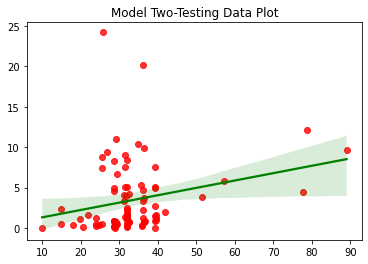

In [73]:
sns.regplot(test_data_width, test_data_price, scatter_kws={"color": "red"}, line_kws={"color": "green"}).set(title='Model Two-Testing Data Plot')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Model Two-Training Data Plot')]

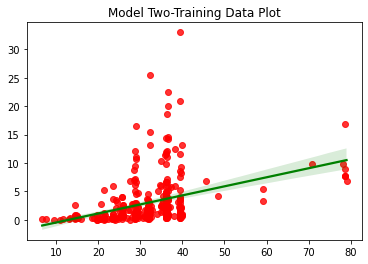

In [74]:
sns.regplot(train_data_width, train_data_price, scatter_kws={"color": "red"}, line_kws={"color": "green"}).set(title='Model Two-Training Data Plot')


**Model Two Conclusion:**

---

It is evident that the values are very approximate to the linear line, which verdicts that there ocuurs minimal errors. Hence based on the accuracy this is proven to be best fit and the model is performing well in predicting values.

**Multi Linear Regression: **

---

